In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
np.random.seed(10)

= Exercice 3

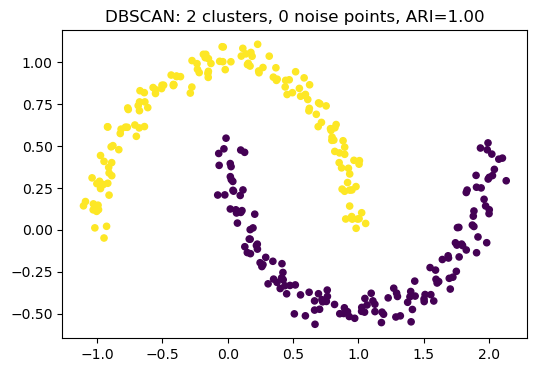

In [8]:
X_moons, y_moons = make_moons(n_samples=300, noise=0.05, 
                               random_state=42)

km_moons = KMeans(n_clusters=2, random_state=42).fit(X_moons)

db = DBSCAN(eps=0.2, min_samples=5)
labels_db = db.fit_predict(X_moons)

n_clusters = len(set(labels_db) - {-1})
n_noise = (labels_db == -1).sum()

plt.figure(figsize=(6, 4))
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=labels_db, cmap='viridis', 
            s=20)
plt.title(f"DBSCAN: {n_clusters} clusters, {n_noise} noise points, "
          f"ARI={adjusted_rand_score(y_moons, labels_db):.2f}")
plt.show()

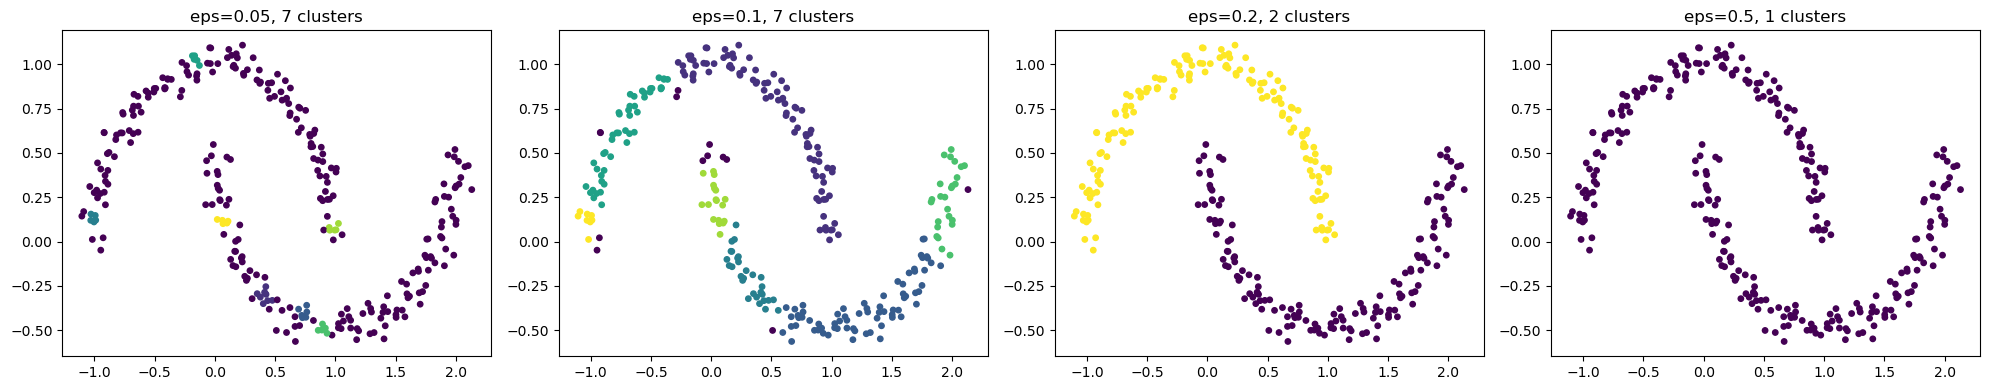

In [4]:
fig, axes = plt.subplots(1, 4, figsize=(20, 4))
for ax, eps in zip(axes, [0.05, 0.1, 0.2, 0.5]):
    db = DBSCAN(eps=eps, min_samples=5)
    labels = db.fit_predict(X_moons)
    n_cl = len(set(labels) - {-1})
    ax.scatter(X_moons[:, 0], X_moons[:, 1], c=labels, cmap='viridis', 
               s=15)
    ax.set_title(f"eps={eps}, {n_cl} clusters")
plt.tight_layout(); plt.show()


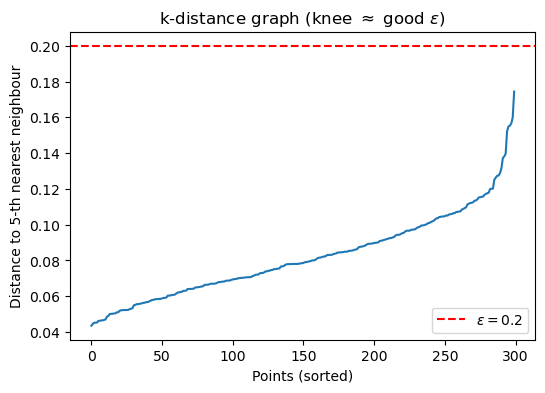

In [5]:
from sklearn.neighbors import NearestNeighbors

k = 5  # minPts
nn = NearestNeighbors(n_neighbors=k)
nn.fit(X_moons)
distances, _ = nn.kneighbors(X_moons)
k_distances = np.sort(distances[:, -1])

plt.figure(figsize=(6, 4))
plt.plot(k_distances)
plt.xlabel("Points (sorted)")
plt.ylabel(f"Distance to {k}-th nearest neighbour")
plt.title("k-distance graph (knee $\\approx$ good $\\varepsilon$)")
plt.axhline(y=0.2, color='r', linestyle='--', label='$\\varepsilon=0.2$')
plt.legend(); plt.show()
